For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

* <s>Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.</s>
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a **draw_line_plot** function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
* Create a **draw_bar_plot** function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
* Create a **draw_box_plot** function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

For each chart, make sure to use a copy of the data frame.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col= 'date')
df.index = pd.to_datetime(df.index)
# Clean data
upper_percent = df['value'].quantile(0.975)
lower_percent = df['value'].quantile(0.025)
df = df[
    (df['value'] > lower_percent) &
    (df['value'] < upper_percent)
    ]


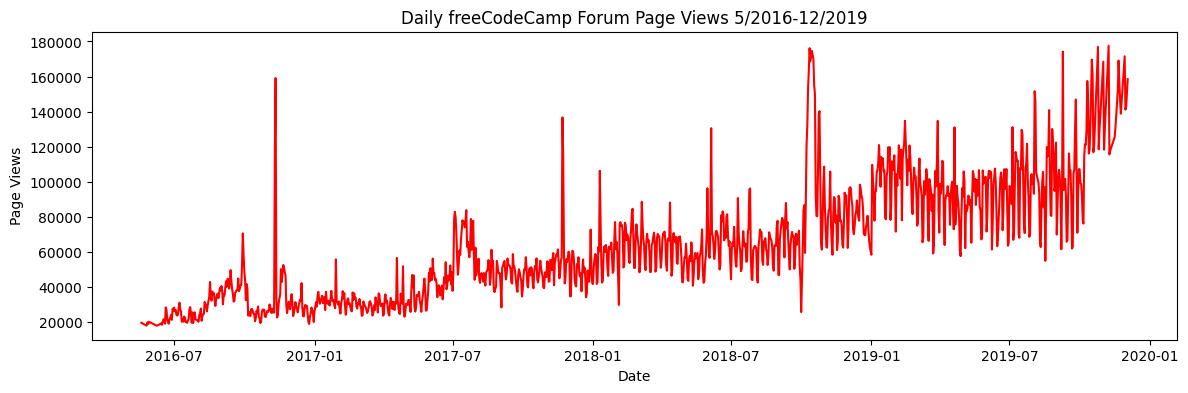

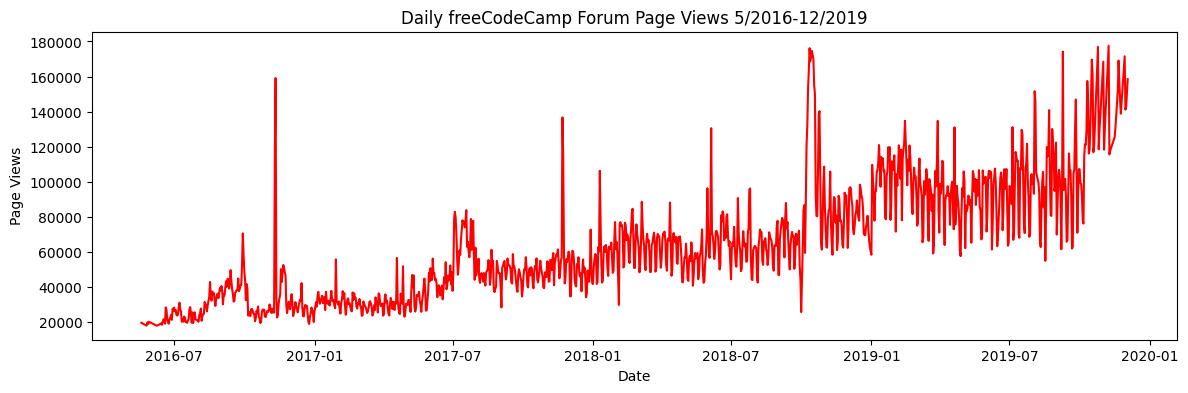

In [3]:

def draw_line_plot():
#       Setting up the figure
    lineplot_df = df.copy()
    fig = plt.figure(figsize=(14, 4))
    ax = plt.gca()
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
#       Generating the figure
    dates = lineplot_df.index
    values = lineplot_df['value']

    ax.plot(dates, values, color= 'red')


#       Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

draw_line_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


IndexError: tuple index out of range

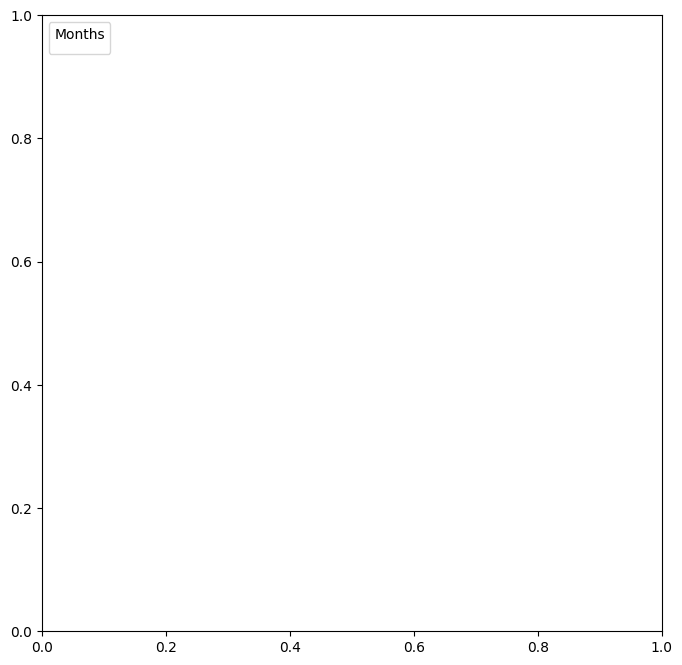

In [7]:
import matplotlib.patches as mpl_patches
import numpy as np
def draw_bar_plot():
    fig, ax = plt.subplots(figsize=(8, 8))
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    monthly_avg = df_bar.groupby(['year', 'month'])['value'].transform('mean')
    df_bar['monthly_avg'] = monthly_avg
    # Draw bar plot


    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    colors = plt.get_cmap('Set2').colors
    
    handles, labels = ax.get_legend_handles_labels()  # Get current legend labels
    ax.legend(handles=handles, labels=month_names, title='Months', loc='upper left')

        # Create bar plot with matplotlib
    width = 0.75  # Set bar width
    unique_years = df_bar['year'].unique()

    # Create bars for each year-month combination
    for i, year in enumerate(unique_years):
        year_data = df_bar[df_bar['year'] == year]
        x = np.full(len(year_data), i)  # X positions for bars (one for each year)
        heights = year_data['value']
        months = year_data['month'] - 1  # Shift month index to start at 0

        # Plot one bar per month within each year using the corresponding color
        ax.bar(x + (months / 12), heights, width=width / 12, color=[colors[m] for m in months], label=year if i == 0 else "")

    # Configure legend
    handles = [mpl_patches.Patch(color=colors[i], label=month_names[i]) for i in range(12)]
    ax.legend(handles=handles, title='Months', loc='upper left')

    # Configure axis labels and ticks
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.set_xticks(np.arange(len(unique_years)))
    ax.set_xticklabels(unique_years, rotation=90)


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()

"""Old code when I thought I could use Seaborn
ax.set_xlabel('Years')
    plt.xticks(rotation= 90)
    ax.set_ylabel('Average Page Views')

    sns.barplot(data= df_bar, x= 'year', y= 'monthly_avg', hue= 'month', palette= 'tab10', ax=ax)
# plot legend = "Months"
# x_label = 'Years'
# y_label = 'Average Page Views'
# Debug: Print all rectangles (bars) in the plot
    rectangles = [rect for rect in ax.get_children() if isinstance(rect, mpl_patches.Rectangle)]
    print(f"Total rectangles: {len(rectangles)}")

    for rect in rectangles:
        print(f"Rectangle: {rect}, Width: {rect.get_width()}, Height: {rect.get_height()}, Visible: {rect.get_visible()}")

"""

In [10]:
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
monthly_avg = df_bar.groupby(['year', 'month'])['value'].transform('mean')
df_bar['monthly_avg'] = monthly_avg

df_bar


,value,year,month,monthly_avg
date,,,,
2016-05-19,19736,2016,5,19432.400000
2016-05-26,18060,2016,5,19432.400000
2016-05-27,19997,2016,5,19432.400000
2016-05-28,19044,2016,5,19432.400000
2016-05-29,20325,2016,5,19432.400000
...,...,...,...,...
2019-11-24,138875,2019,11,143166.428571
2019-11-29,171584,2019,11,143166.428571
2019-11-30,141161,2019,11,143166.428571


C:\Users\zagge\AppData\Local\Temp\ipykernel_16164\3040605767.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_box, x= 'year', y= 'value', palette= 'tab10', ax= axes[0], flierprops=dict(marker='.', markersize= 2))
c:\Users\zagge\miniforge3\envs\practice\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zagge\miniforge3\envs\practice\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\zagge\miniforge3\envs\practice\Lib\site-pac

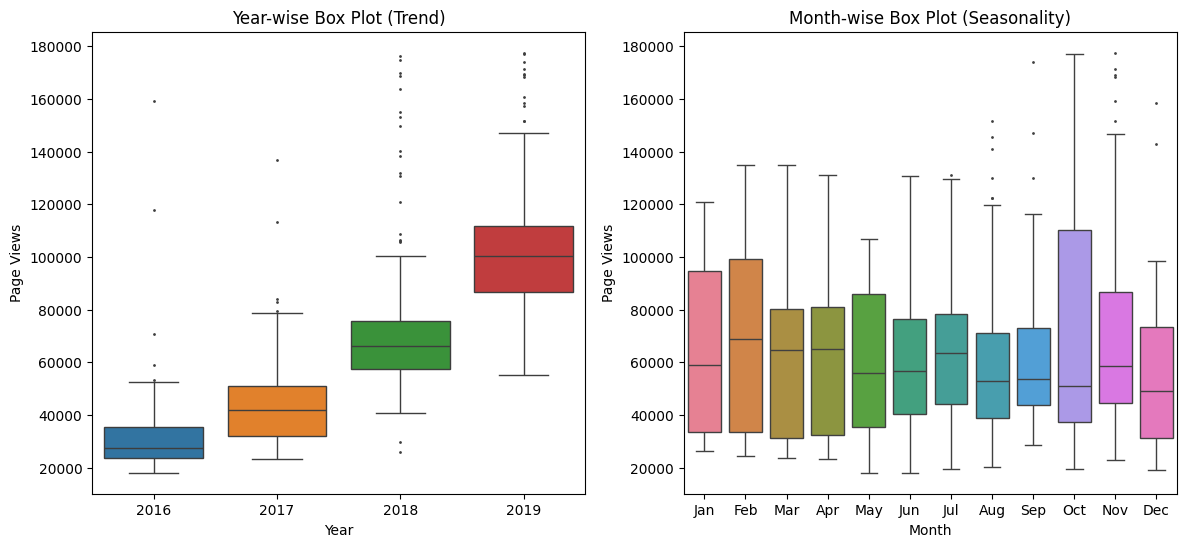

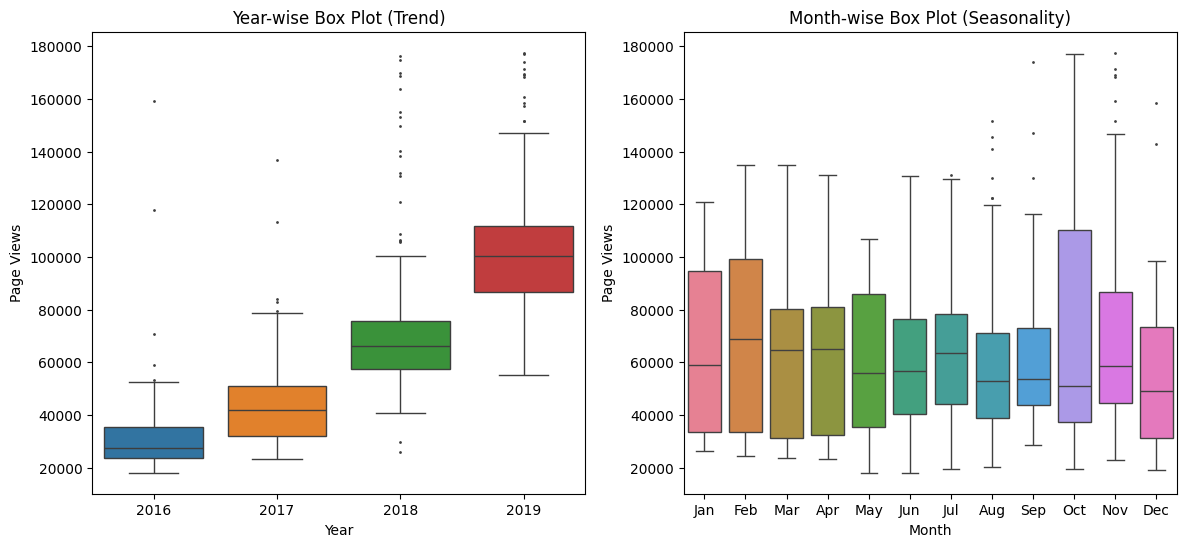

In [32]:

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Changing data type to float for value, and categorical for months
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df_box['value'] = df_box['value'].astype(float)
    df_box['month'] = pd.Categorical(df_box['month'], categories= months, ordered= True)

    # Creating the Years/Months
    years = sorted(df_box['year'].unique())
    year_data = [df_box[df_box['year'] == year]['value'] for year in years]
    month_data = [df_box[df_box['month'] == month]['value'] for month in months]

    # Figure setup
    fig, axes = plt.subplots(1, 2, figsize= (14, 6))
    palette = sns.color_palette('husl', 12)
    # First boxplot
    sns.boxplot(df_box, x= 'year', y= 'value', palette= 'tab10', ax= axes[0], flierprops=dict(marker='.', markersize= 2))
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Second boxplot
    sns.boxplot(df_box, x= 'month', y= 'value', ax= axes[1], flierprops=dict(marker='.', markersize= 2), palette= palette, legend= False)
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()

C:\Users\zagge\AppData\Local\Temp\ipykernel_16164\88722443.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_box, x= 'month', y= 'value', flierprops=dict(marker='.', markersize= 2), palette= palette, legend= False)
c:\Users\zagge\miniforge3\envs\practice\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zagge\miniforge3\envs\practice\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\zagge\miniforge3\envs\practice\Lib\site-pa

<Axes: xlabel='month', ylabel='value'>

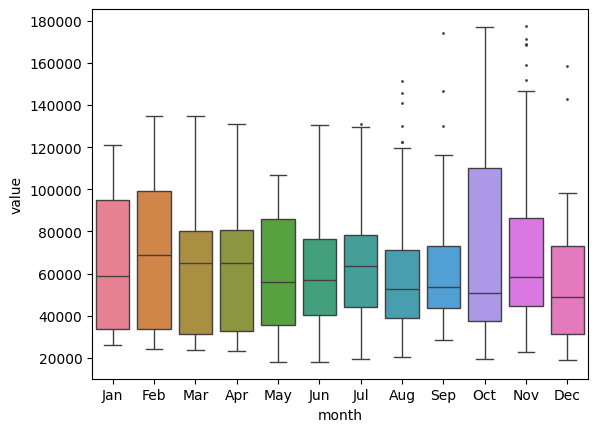

In [21]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Changing data type to float for value, and categorical for months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_box['value'] = df_box['value'].astype(float)
df_box['month'] = pd.Categorical(df_box['month'], categories= months, ordered= True)

# Creating the Years
years = sorted(df_box['year'].unique())
year_data = [df_box[df_box['year'] == year]['value'] for year in years]

# Debugging to make sure years are seperated
#for year, data in zip(years, year_data):
    #print(f'Year: {year}, data length: {len(data)}')

# Creating Month data

month_data = [df_box[df_box['month'] == month]['value'] for month in months]

# Debugging Months
# for month, data in zip(months, month_data):
    # print(f'Month: {month}, data length: {len(data)}')

# Drawing the first boxplot
#sns.boxplot(df_box, x= 'year', y= 'value', palette= 'tab10', flierprops=dict(marker='.', markersize= 2))

# Second boxplot
palette = sns.color_palette('husl', 12)
sns.boxplot(df_box, x= 'month', y= 'value', flierprops=dict(marker='.', markersize= 2), palette= palette, legend= False)


C:\Users\zagge\AppData\Local\Temp\ipykernel_16164\198147408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_box, x= 'year', y= 'value', palette= 'tab10', ax= axes[0], flierprops=dict(marker='.', markersize= 2))
c:\Users\zagge\miniforge3\envs\practice\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zagge\miniforge3\envs\practice\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\zagge\miniforge3\envs\practice\Lib\site-packa

Text(0, 0.5, 'Page Views')

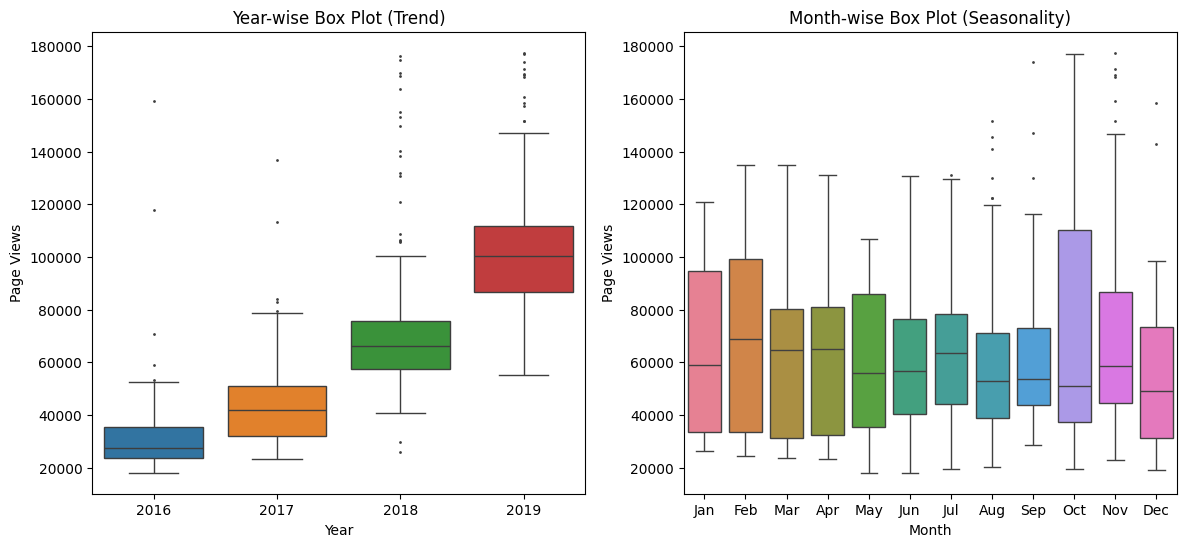

In [31]:
# Figure setup
fig, axes = plt.subplots(1, 2, figsize= (14, 6))
palette = sns.color_palette('husl', 12)
# First boxplot
sns.boxplot(df_box, x= 'year', y= 'value', palette= 'tab10', ax= axes[0], flierprops=dict(marker='.', markersize= 2))
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

# Second boxplot
sns.boxplot(df_box, x= 'month', y= 'value', ax= axes[1], flierprops=dict(marker='.', markersize= 2), palette= palette, legend= False)
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

In [48]:
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
df_bar

,value,year,month
date,,,
2016-05-09,1201,2016,5
2016-05-10,2329,2016,5
2016-05-11,1716,2016,5
2016-05-12,10539,2016,5
2016-05-13,6933,2016,5
...,...,...,...
2019-11-29,171584,2019,11
2019-11-30,141161,2019,11
2019-12-01,142918,2019,12


1238


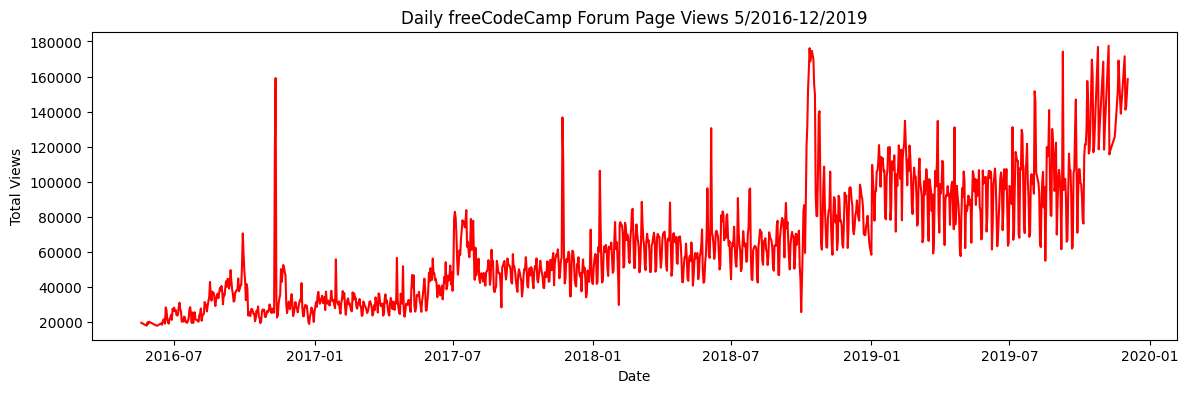

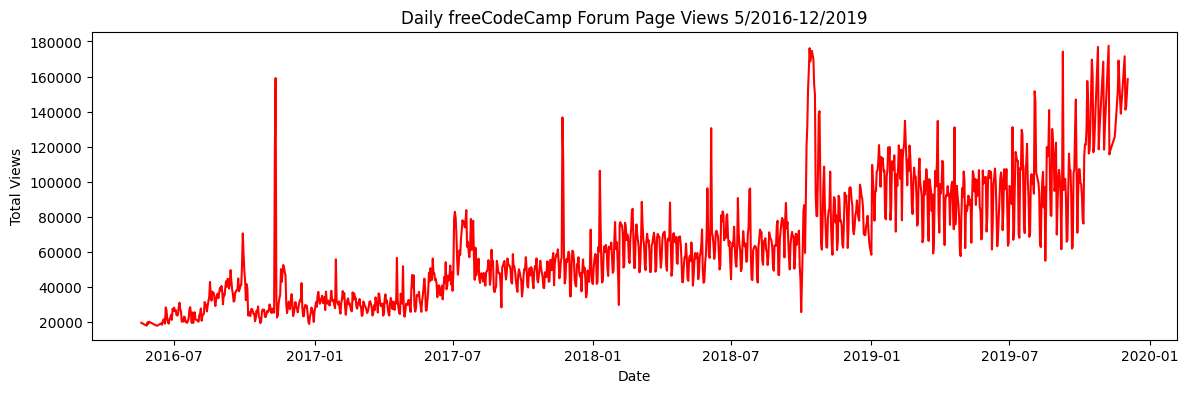

In [45]:
draw_line_plot()

In [43]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col= 'date')
df.index = pd.to_datetime(df.index)
upper_percent = df['value'].quantile(0.975)
lower_percent = df['value'].quantile(0.025)
filtered_df = df[
    (df['value'] > lower_percent) &
    (df['value'] < upper_percent)
    ]
len(filtered_df)

1238